# Data Science Worksheet

In [1]:
%matplotlib inline


/home/rob/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:279: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


## 1. Ask our question

Which aspects of Python programming most commonly confuses programmers?

## 2. Get the data

Stack Overflow has a lot of relevant data.  For the purposes of today's exercise, let's pretend
that Stack Overflow does not an API.

So which publicly accessible pages hold that data?

In [2]:
SO_URL = "https://stackoverflow.com/questions/tagged/{}?page={}&sort=frequent&pagesize=50"
# print(SO_URL.format("python", 1))

So we want the HTML from `SO_URL`, which is available via the HTTP
protocol that a browser users.  How do we send that request in Python?

### the `requests` library

In [3]:
import requests

SO_response = requests.get(SO_URL.format('python', 1))

if SO_response.status_code == 200:
    SO_page_html = SO_response.text

# print(SO_page_html)

### Data wrangling

So now we have our raw (primary) data.  It needs to be cleaned and structured.



In [4]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(SO_page_html, "html.parser")

question_summaries = soup.find_all("div", class_='question-summary')

# print(len(question_summaries))
# print(question_summaries[0])

Drill down further.

In [5]:
dataset = []

for summary in question_summaries:
#     print(type(summary))
    question = summary.find('a', class_='question-hyperlink').text
    views = int(summary.find('div', class_='views')['title'].split(" ")[0].replace(",", ""))
    vq = (views, question)
    
    dataset.append(vq)

print(dataset)

[(103186, '“Least Astonishment” and the Mutable Default Argument'), (86091, 'How do I test multiple variables against a value?'), (990199, "Understanding Python's slice notation"), (202419, 'Asking the user for input until they give a valid response'), (15092, 'List of lists changes reflected across sublists unexpectedly'), (854070, 'How to clone or copy a list?'), (74729, 'How do I create a variable number of variables?'), (533995, 'How do you split a list into evenly sized chunks?'), (856007, 'How do I pass a variable by reference?'), (280565, 'Remove items from a list while iterating'), (944094, 'Making a flat list out of list of lists in Python'), (5202, 'How to make good reproducible pandas examples'), (403552, 'How can I read inputs as integers?'), (1555811, 'What does the “yield” keyword do?'), (192766, 'Short Description of the Scoping Rules?'), (340749, 'What does ** (double star/asterisk) and * (star/asterisk) do for parameters?'), (2272680, 'Calling an external command in Py

In [6]:
dataset2 = []
for vq in dataset:
    views, question = vq
    words = question.split(" ")
    for word in words: 
        dataset2.append((views, word))

# dataset

# print(dataset2)

## 3. Explore the data.

In [27]:
import pandas as pd

df = pd.DataFrame(dataset2, columns=("votes", "word"))

df # You don't need to print df. -RH

,votes,word
0,103186,“Least
1,103186,Astonishment”
2,103186,and
3,103186,the
4,103186,Mutable
5,103186,Default
6,103186,Argument
7,86091,How
8,86091,do
9,86091,I


In [28]:
for x, i in df.iterrows():
    if "==" in i['word']:
        print(x, i['votes'], i['word']) 

# df2_by_word = df.groupby(by='word').mean()

# df['votes']  = df['votes'].astype(float)

# print(df.dtypes)

df2 = df.groupby('word', as_index=False).sum().sort_values('votes', ascending = False) 
#Added a sort method so you see what the top values are -RH
df2
#You can see below you need to split "?" off -RH
#Also gives you a quick way to drop articles - RH 

138 1463217 ==
255 9046 ==
325 1075428 '=='


,word,votes
57,a,13467739
129,in,11599765
28,How,10139689
35,Python,7011216
222,to,6288572
217,the,6166481
101,do,5963701
29,I,5546385
49,What,4819701
103,does,4444251


In [33]:
# Start your booleans -RH

df2 = df2.drop(df2[(df2.word == 'a') | (df2.word == 'in') | (df2.word == 'to') # You can iterate through a list of articles here to further refine
          ].index).sort_values('votes', ascending = False)
df2.head(20)

#Something is starting to emerge.... "Global variabes" perhaps? -RH

,word,votes
28,How,10139689
35,Python,7011216
217,the,6166481
101,do,5963701
29,I,5546385
49,What,4819701
103,does,4444251
162,of,3696383
146,list,3431089
231,variables,3292495


In [34]:
word_frequencies = {x:y for x, y in df2.values}

In [35]:
print(word_frequencies)

{'How': 10139689, 'Python': 7011216, 'the': 6166481, 'do': 5963701, 'I': 5546385, 'What': 4819701, 'does': 4444251, 'of': 3696383, 'list': 3431089, 'variables': 3292495, 'do?': 3019028, 'function': 2795114, 'an': 2518703, 'by': 2419757, 'that': 2383391, 'than': 2383391, 'global': 2383391, 'Using': 2383391, 'them': 2383391, 'one': 2383391, 'created': 2383391, 'other': 2383391, 'Calling': 2272680, 'command': 2272680, 'external': 2272680, 'on': 2253997, 'install': 2081965, 'pip': 2081965, 'Windows?': 2081965, 'into': 2007830, 'or': 1947590, 'value?': 1649841, 'dictionary': 1563750, 'sort': 1563750, 'keyword': 1555811, '“yield”': 1555811, 'Converting': 1473835, 'string': 1473835, 'datetime': 1473835, '==': 1472263, '__name__': 1463217, 'if': 1463217, '“__main__”:': 1463217, 'lists': 1359749, 'two': 1308769, 'is': 1295750, 'you': 1285237, 'can': 1208670, 'conditional': 1169004, 'operator?': 1169004, 'Does': 1169004, 'have': 1169004, 'ternary': 1169004, 'Why': 1125646, 'and': 1110212, 'using

Now let's think more about the data via visualization:

(-0.5, 399.5, 199.5, -0.5)

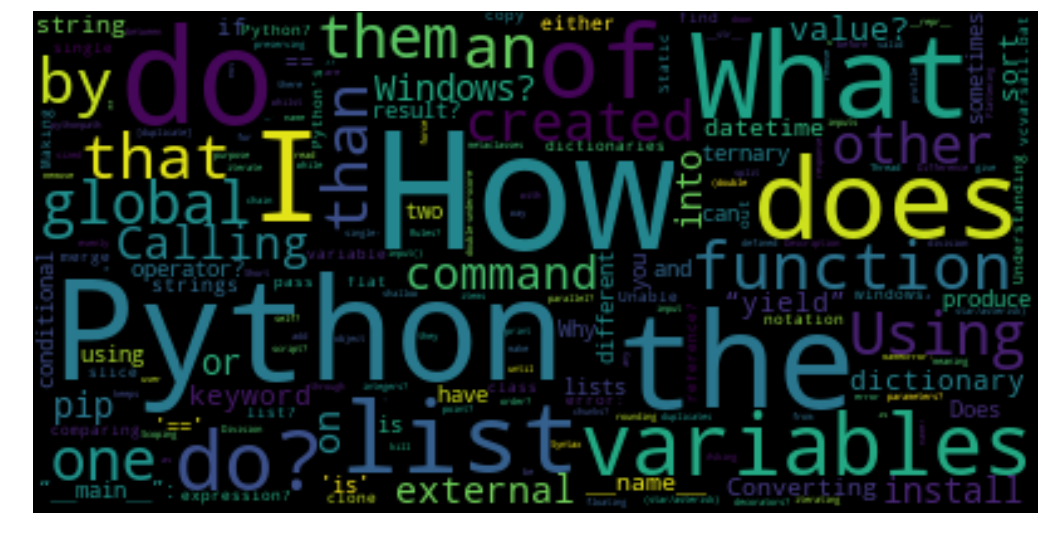

In [36]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud().generate_from_frequencies(word_frequencies)

plt.figure(figsize=(18, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

## 4. Model the data (optional)

## 5. Communicate the data.